In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변한하는 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer


# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 추천
from surprise import SVD, Dataset, Reader, accuracy
# from surprise.model_selection import train_test_split

# 파일 저장
import pickle

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 불러온다.

In [2]:
df = pd.read_csv('data/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [4]:
df.isna().sum()

create_date      0
price            0
text             0
phone_model      0
factory_price    0
maker            0
price_index      0
dtype: int64

### 전처리

In [5]:
# create_date를 수치적으로 환산하기 위해 unix time으로 변경한다.
# unix time : 1970년 1월 1일 0시 0분 0초 0ms를 0으로 지정하고 1ms 단위로
# 1씩 증가 혹은 감소시킨 정수값.
def date_to_unixtime(date_str) :
    # 날짜 값으로 변환한다.
    a1 = datetime.datetime.strptime(date_str[:10], '%Y-%m-%d').timetuple()
    timestamp = time.mktime(a1)
    
    return timestamp

In [6]:
# 시간값을 모두 unixtime으로 변경한다.
df['create_unixtime'] = df['create_date'].apply(lambda x : date_to_unixtime(x))
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09
...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09


In [7]:
# 단말기 모델
df['phone_model'].value_counts()

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 7 plus 32gb       12
iphone 6s Plus 16gb      12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

In [8]:
# 띄어쓰기를 기준으로 잘라내어 용량을 추출한다.
a1 = df['phone_model'].apply(lambda x : x.split(' ')[-1])
df['phone_model_storage'] = a1
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb
...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb


In [9]:
a1 = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[:-1]))
df['phone_model_detail'] = a1
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb,iphone 6
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb,lg g5
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb,lg u
...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb,iphone 7
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb,iphone 7
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus


### 감성분석으로 물품의 상태 분류하기

In [10]:
# 단말기 별 5% 위치와 95% 위치의 값을 가져온다.
a1 = df.groupby('phone_model')['price']

# 같은 단말기 내에서 하위 5% 위치의 값을 넣어준다.
df['price_lower'] = a1.transform(lambda x : x.quantile(0.05))
# 같은 단말기 내에서 상위 95% 위치의 값을 각각 넣어준다.
df['price_upper'] = a1.transform(lambda x : x.quantile(0.95))

df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,price_lower,price_upper
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb,iphone 6,260000.0,659500.0
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge,179500.0,370500.0
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6,136000.0,310000.0
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb,lg g5,100000.0,500000.0
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb,lg u,18000.0,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus,740000.0,1325000.0
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb,iphone 7,730000.0,1300000.0
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb,iphone 7,730000.0,1300000.0
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus,740000.0,1325000.0


In [11]:
# 가격대를 구분할 함수
def get_price_level(price, lower, upper) :
    # 단말기 가격이 최소값 보다 작다면
    if price <= lower :
        return '0'
    # 단말기 가격이 최대값 보다 크다면
    elif price >= upper :
        return '2'
    else :
        return '1'

In [12]:
# 하위 5%, 상위 95% 위치의 가격과 비교하여 가격 레벨을 설정해준다.
df['price_level'] = df.apply(lambda row : get_price_level(row['price'],
                                                           row['price_lower'],
                                                           row['price_upper']),
                                                            axis=1)
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,price_lower,price_upper,price_level
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb,iphone 6,260000.0,659500.0,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge,179500.0,370500.0,2
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6,136000.0,310000.0,1
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb,lg g5,100000.0,500000.0,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb,lg u,18000.0,400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus,740000.0,1325000.0,1
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb,iphone 7,730000.0,1300000.0,2
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb,iphone 7,730000.0,1300000.0,2
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus,740000.0,1325000.0,2


### 텍스트 전처리를 위한 불용어 데이터를 불러온다.

In [13]:
# 중고나라 불용어 사전을 불러온다.
with open('data/used_mobile_phone_stopwords.pkl', 'rb') as fp :
    stopwords = pickle.load(fp)
    
print(stopwords)

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시', '주세', '노트', '문자', '화이트', '연락', '블랙', '구매', '및', '기재', '년', '품', '월', '용', '로즈', '상세', '항목', '완료', '지역', '개', '실버', '신청하기', '색상', '타', '기기', '서울', '후', '문의', '원', '설명', '판', '전화', '엣지', '모두', '경우', '보시', '위', '정확히', '정도', '될', '등', '휴대폰', '되', '일', '플러스', 'g', 'lg', 'skt', 'gb', 'kt', 'sk', 'se', 'lgu', 'u', 'lte', 'fl', 'ltea', 'nl', 'k', 'z', 'v', 'lgt', 'gs', 'gl', 'ss', 'cat', 'nk', 'b', 'com', 'gpro', 'ea', 'ns', 'ios', 'gt', 'or', 'usb', 'amp', 'umi', 'lgfl', 'es', 'howufeel', 'gk', 'ek', 'xperia', 'y', 'wpi', 'mtk', 'd', 'www', 'sss', 'fs', 'el', 'lglp', 'white', 'http', 'o', 'l', 'zv', 'e', 'al', 'gn', 'ps', 'naver', 'rome', 'gx', 'lglb', 'ssanmai', 'f', '계', '명', '들', '적', '자', '상', '화', '대', '중', '장', '간', '네', '분', '권', '이', '백', '째', '형', '분들', '번째', '씩', '쯤', '식', '조', '성', '꺼', '님', '당', '인', '틱', '짱', '샵', '군', '천', '아', '플', '흡', '휴', '엑', ',', ',,', '+,', '++++++++++++++++++++++++++++++++++++++', ',,,,,,', '그리고

### 형태소 추출

In [14]:
def text_clearning(text) :
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 지정한 정규식에 해당하지 않는 것을 길이가 0인 문자열로 변경한다.
    result = hangul.sub('', text)
    return result

In [15]:
df['text'] = df['text'].apply(lambda x : text_clearning(x))
df['text']

0       아이폰플러스 블랙애플라이트 기가 팝니다  아이폰플러스 블랙애플라이트 기가 팝니다  ...
1       갤럭시엣지 기가 팝니다 직거래  갤럭시엣지 기가 품명 갤럭시엣지제품 단품상태 사진참...
2       갤럭시 풀박스로 팝니다 새상품급  실기스조차 없어요  직접거래 구매한지 개월만에 해...
3          티탄 폰 단품판매합니다  직접거래   티탄 폰 단품판매합니다 올 월일까지 가능...
4         엑스페리아      미사용 새제품 팝니다  소니 엑스페리아  울트라       ...
                              ...                        
4946    미개봉 언락폰 아이폰플러스  골드   강북 도봉 언락폰 미개봉 일본판 아이폰플러스 ...
4947    미국판 아이폰  제트블랙 강남역삼 대 미개봉언락 애플  강남역삼 미국판 아이폰  제...
4948    아이폰 미개봉 홍콩판 팝니다 케이스강화유리서비스 종류다양 아이폰   구매한제품  미...
4949    미개봉 언락폰 아이폰플러스  골드   강북 도봉 미개봉 언락폰 미개봉 일본판 아이폰...
4950     팝니다  아이폰   제트블랙 북미판  카메라 무음 국내리퍼 가능     미국 공홈...
Name: text, Length: 4951, dtype: object

In [16]:
# 형태소를 추출한다.
def get_pos(x) :
    # 형태소 분리를 위한 객체
    tagger = Okt()
    # 형태소를 분리한다.
    poses = tagger.morphs(x)
    # print(poses)
    
    result = []
    
    # 불용어에 해당하지 않는 것만 담는다.
    for a1 in poses :
        if poses not in stopwords :
            result.append(a1)
            
    return result

In [17]:
pos_list = df['text'].apply(lambda x : get_pos(x))
pos_list

0       [아이폰, 플러스, 블랙, 애플, 라이트, 기, 가, 팝니다, 아이폰, 플러스, 블...
1       [갤럭시, 엣지, 기, 가, 팝니다, 직거래, 갤럭시, 엣지, 기, 가, 품명, 갤...
2       [갤럭시, 풀, 박스, 로, 팝니다, 새, 상품, 급, 실기스, 조차, 없어요, 직...
3       [티탄, 폰, 단, 품, 판매, 합니다, 직접, 거래, 티탄, 폰, 단, 품, 판매...
4       [엑스페리아, 미사, 용, 새, 제품, 팝니다, 소니, 엑스페리아, 울트라, 팝, ...
                              ...                        
4946    [미개, 봉, 언락폰, 아이폰, 플러스, 골드, 강북, 도봉, 언락폰, 미개, 봉,...
4947    [미국, 판, 아이폰, 제트, 블랙, 강남, 역삼, 대, 미, 개봉, 언, 락, 애...
4948    [아이폰, 미개, 봉, 홍콩, 판, 팝니다, 케이스, 강화유리, 서비스, 종류, 다...
4949    [미개, 봉, 언락폰, 아이폰, 플러스, 골드, 강북, 도봉, 미개, 봉, 언락폰,...
4950    [팝니다, 아이폰, 제트, 블랙, 북미판, 카메라, 무음, 국내, 리퍼, 가능, 미...
Name: text, Length: 4951, dtype: object

In [18]:
# 하나의 리스트로 가져온다.
pos_list2 = pos_list.tolist()
# sum(리스트1, 리스트2) : 두 리스트를 합친다.
# 두 번째 넣어준 리스트의 형태로 맞춰서 합친다.
corpus = sum(pos_list2, [])
corpus

['아이폰',
 '플러스',
 '블랙',
 '애플',
 '라이트',
 '기',
 '가',
 '팝니다',
 '아이폰',
 '플러스',
 '블랙',
 '애플',
 '라이트',
 '기',
 '가',
 '팝니다',
 '아이폰',
 '플러스',
 '블랙',
 '애플',
 '라이트',
 '기',
 '가',
 '팝니다',
 '리퍼',
 '기간',
 '이',
 '만료',
 '되어서',
 '하우',
 '징',
 '을',
 '하게',
 '되었습니다',
 '상태',
 '초',
 '급',
 '기',
 '스',
 '도',
 '없습니다',
 '아',
 '아이폰',
 '플러스',
 '블랙',
 '애플',
 '라이트',
 '기',
 '가',
 '팝니다',
 '아이폰',
 '플러스',
 '블랙',
 '애플',
 '라이트',
 '기',
 '가',
 '팝니다',
 '리퍼',
 '기간',
 '이',
 '만료',
 '되어서',
 '하우',
 '징',
 '을',
 '하게',
 '되었습니다',
 '상태',
 '초',
 '급',
 '기',
 '스',
 '도',
 '없습니다',
 '블랙',
 '하우',
 '징',
 '애플',
 '라이트',
 '골드',
 '홈',
 '버튼',
 '링',
 '골드',
 '카메라',
 '링',
 '골드',
 '볼륨',
 '버튼',
 '골드',
 '슬립',
 '버튼',
 '검금',
 '으로',
 '심플',
 '하고',
 '튀지',
 '않게',
 '이쁘게',
 '했구요',
 '유심',
 '만',
 '꽂고',
 '바로',
 '사용',
 '하시면',
 '됩니다',
 '사람',
 '들',
 '이',
 '아이폰',
 '이냐',
 '고',
 '자주',
 '물어보고',
 '실제',
 '로',
 '보시',
 '면',
 '더욱',
 '이쁩니다',
 '밤',
 '에',
 '영롱하게',
 '맥북',
 '처럼',
 '뒷',
 '면',
 '에',
 '사과',
 '로고',
 '가',
 '비춰지고',
 '요전',
 '아이폰',
 '으로',
 '넘어가기',
 '위해',
 '서',
 '판매',
 '합니다',

In [19]:
# 단어 : 개수의 형의 사전을 생성한다.
counter = Counter(corpus)
# counter

In [20]:
# 빈도수가 가장 많은 단어 3000개를 추출한다.
a1 = counter.most_common(3000)
# a1

In [21]:
# a1

In [22]:
# 단어만 추출해서 담는다.
common_words = []
for key, value in a1 :
    common_words.append(key)

### TF-IDF 벡터 생성

In [23]:
# 전체 문장에서 가장 많이 나온 단어 3000개에 해당하는 것들만 담는다.
def get_common_pos(x) :
    tagger = Okt()
    poses = tagger.pos(x)
    
    pos_list = []
    
    # 형태소 만큼 반복한다.
    for a1, _ in poses :
        # 가장 많이 나온 3000개 단어에 해당한다면 리스트에 담는다.
        if a1 in common_words :
            pos_list.append(a1)
    
    return pos_list

In [24]:
# 단어당 몇개씩 들어있는지 에 대한 백터를 생성한다.
index_vectorizer = CountVectorizer(tokenizer=lambda x : get_common_pos(x))
X = index_vectorizer.fit_transform(df['text'].tolist())
X

<4951x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 292135 stored elements in Compressed Sparse Row format>

In [25]:
# TF-IDF 벡터를 생성한다.
t_vector = TfidfTransformer()
X = t_vector.fit_transform(X)
X

<4951x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 292135 stored elements in Compressed Sparse Row format>

In [26]:
# 결과 데이터
y = df['price_level']
y

0       1
1       2
2       1
3       1
4       1
       ..
4946    1
4947    2
4948    2
4949    2
4950    2
Name: price_level, Length: 4951, dtype: object

### 기본 모델을 통한 교차 검증

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [28]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [29]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [30]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [31]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    # 다중 분류이므로 accuracy로 측정한다.
    r1 = cross_val_score(m1, X, y, scoring='accuracy', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.8709327142391657
LR 평균 성능 수치 : 0.871540404040404
SVM 평균 성능 수치 : 0.8840611762789182
DT 평균 성능 수치 : 0.8386176278918214
RF 평균 성능 수치 : 0.89900944933203
Ada 평균 성능 수치 : 0.852150944933203
GB 평균 성능 수치 : 0.8773977680026066
LGBM 평균 성능 수치 : 0.9020393450635387
XGB 평균 성능 수치 : 0.8988082437275985


### 하이퍼 파라미터 튜닝

In [32]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [33]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [34]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='accuracy', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 5}
최적의 모델 평균 성능 : 0.8709327142391657
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 10, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.8885039915281852
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균 성능 : 0.9020393450635386
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 5}
최적의 모델 평균 성능 : 0.8664923427826654
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 300}
최적의 모델 평균 성능 : 0.9000191430433366
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.8598252688172042
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.8864878624959271
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.9028466112740305
--------------------

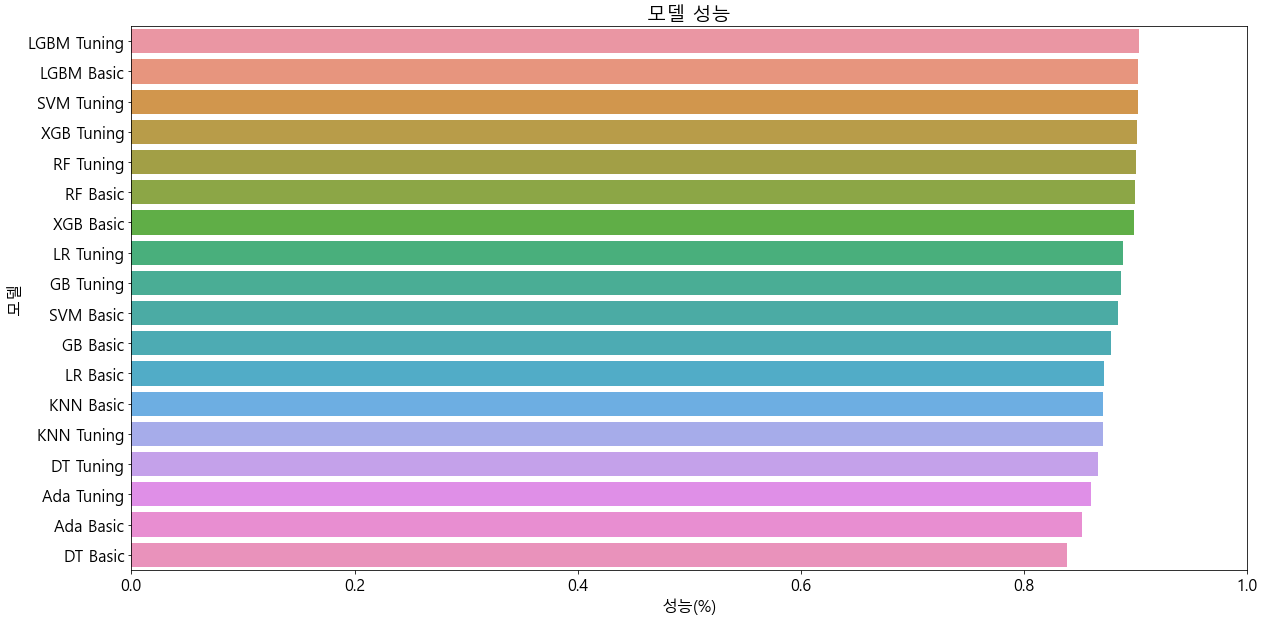

In [35]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 최종 평가를 수행한다.

In [36]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# 기본 모델과 튜닝된 모델이 담긴 리스트를 합친 새로운 리스트를 생성한다.
total_model = model_list + tuning_model

In [38]:
# 학습용 데이터를 학습한다.
for m1 in total_model :
    m1.fit(X_train, y_train)

In [39]:
# 학습용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_train)
    pred_list.append(pred)

In [40]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_train, p1)
    
    dict1['accuracy'].append(r1)
    dict1['name'].append(result_name[idx])

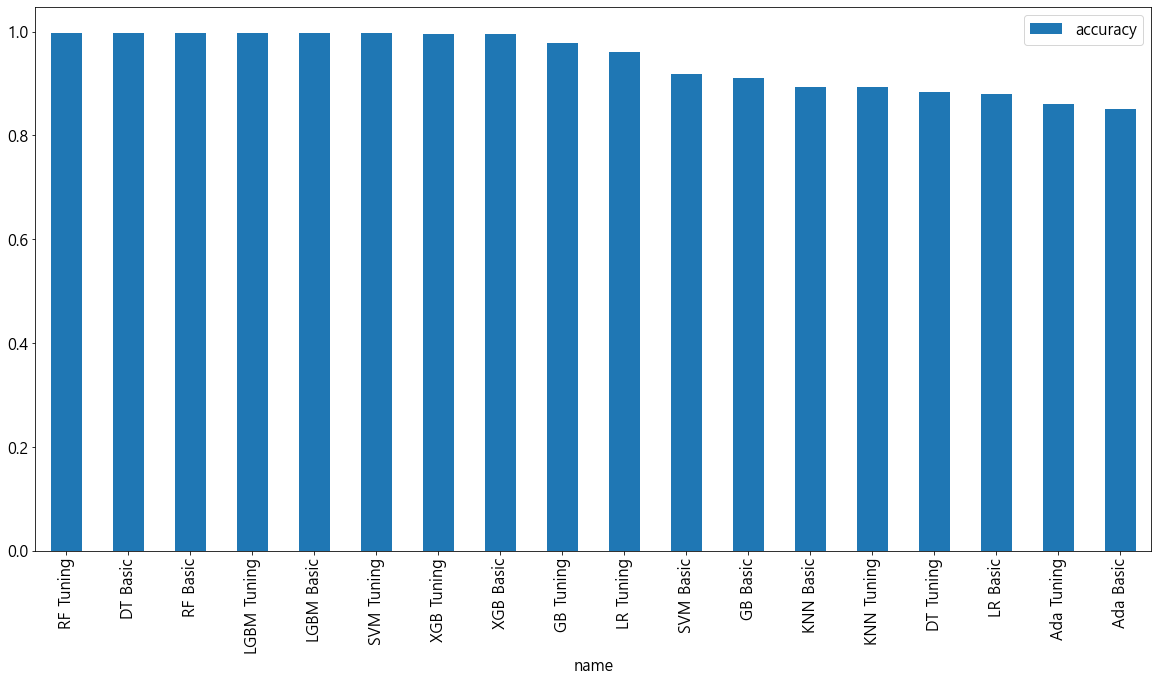

In [41]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('accuracy', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

In [42]:
# 검증용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_test)
    pred_list.append(pred)

In [43]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_test, p1)

    dict1['accuracy'].append(r1)
    dict1['name'].append(result_name[idx])

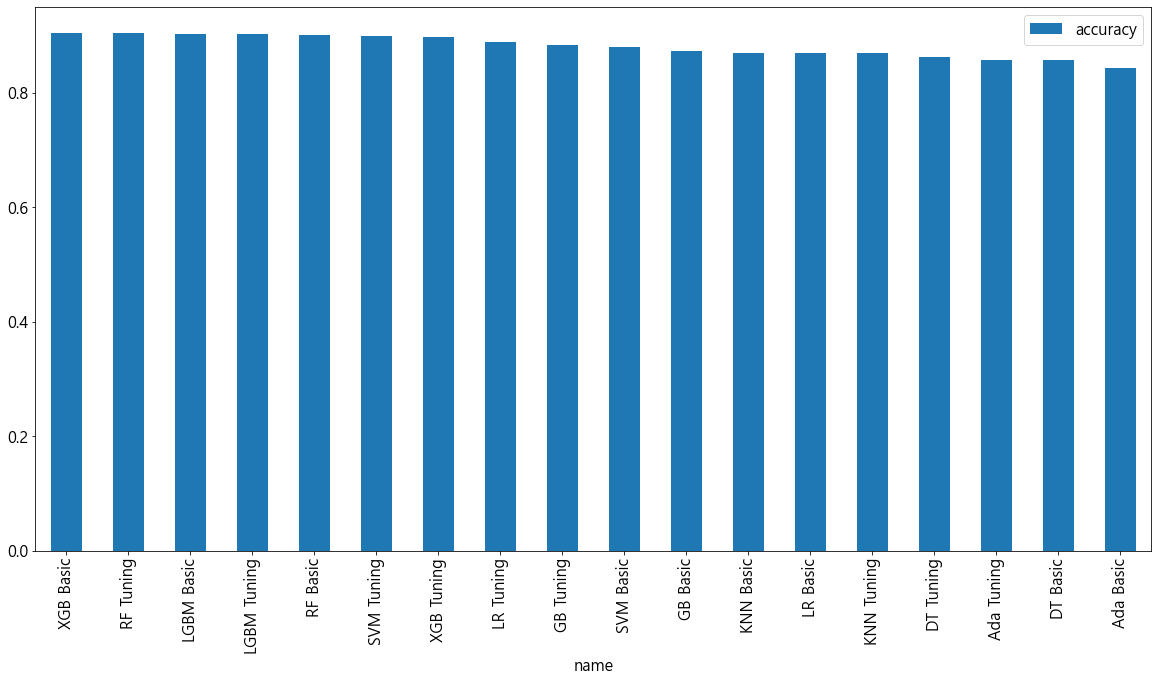

In [44]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('accuracy', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

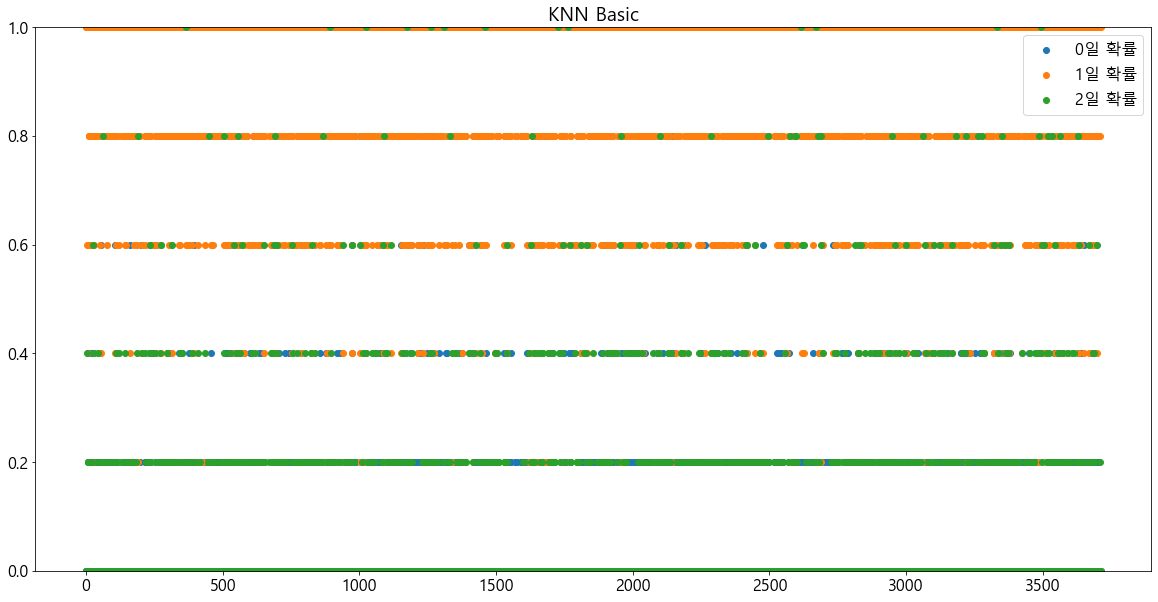

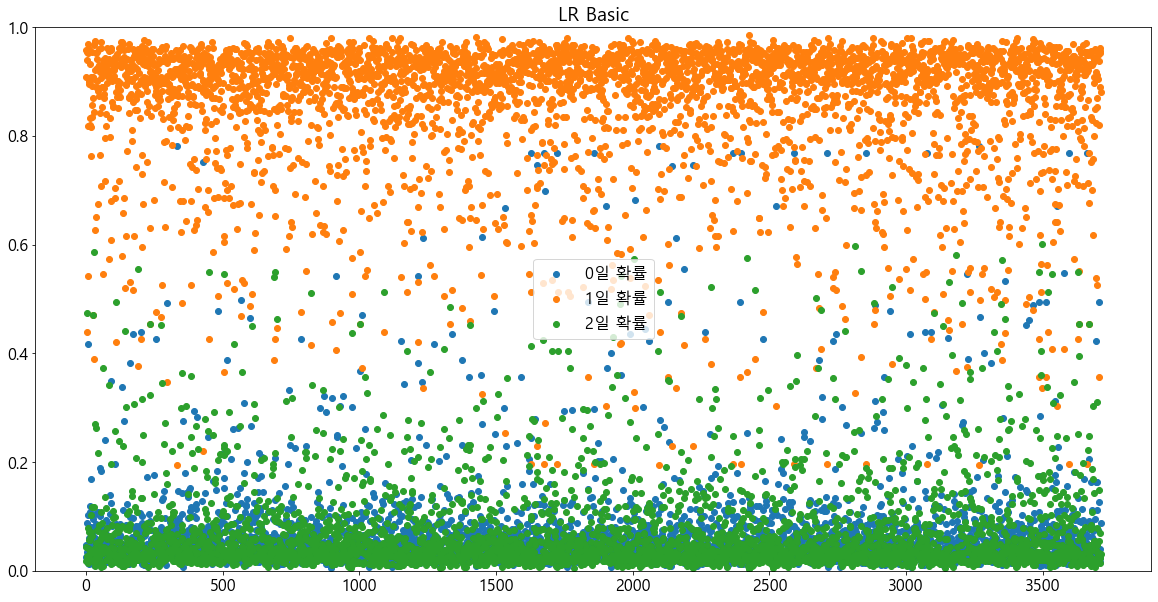

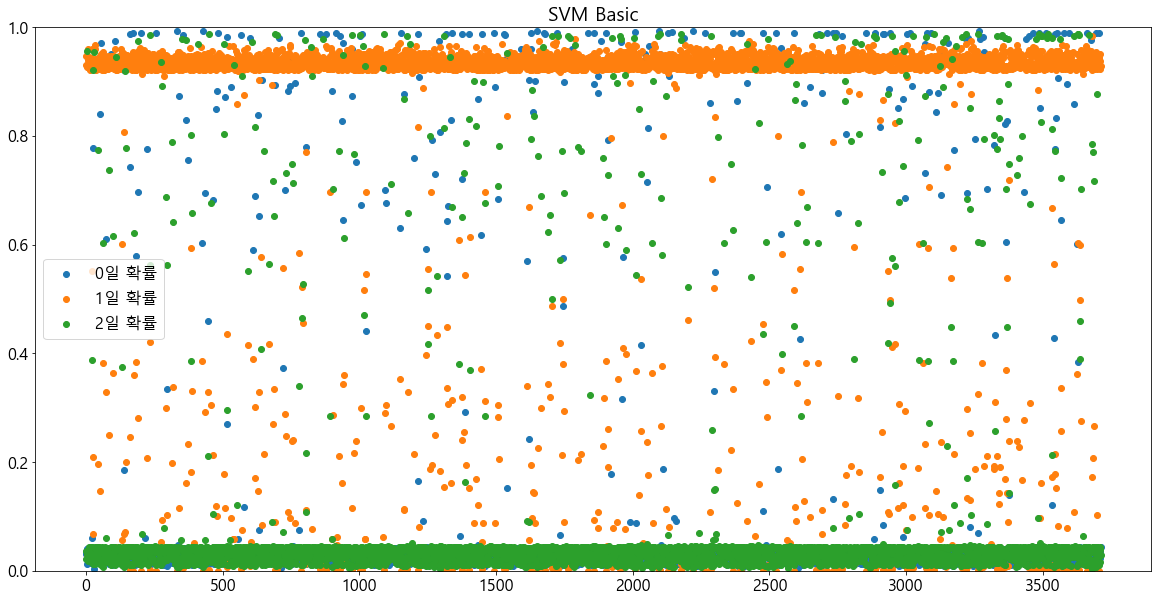

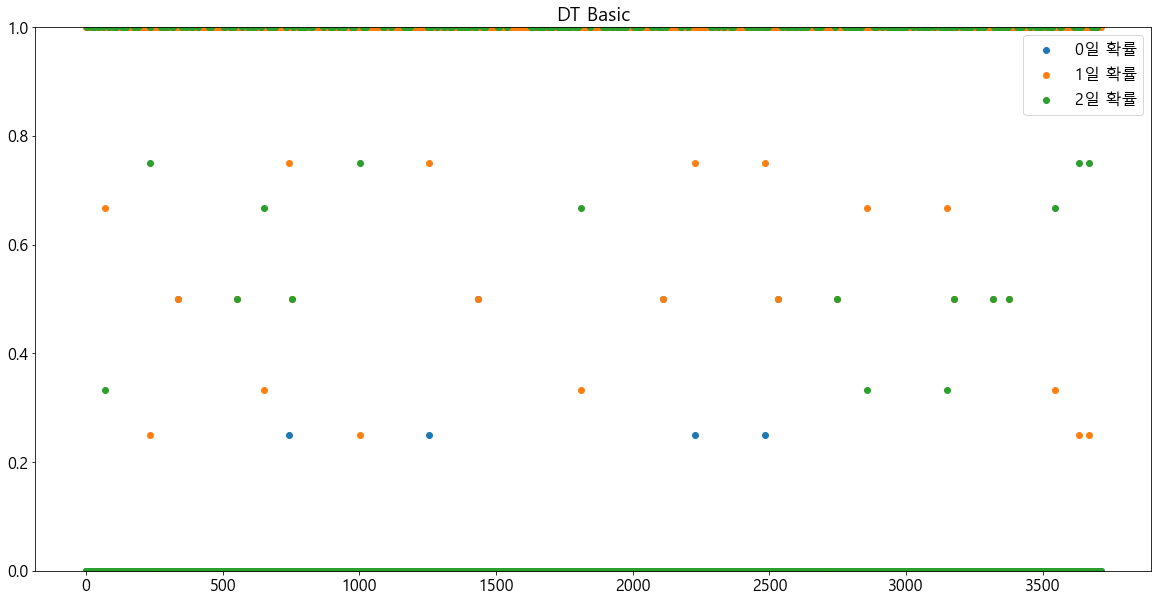

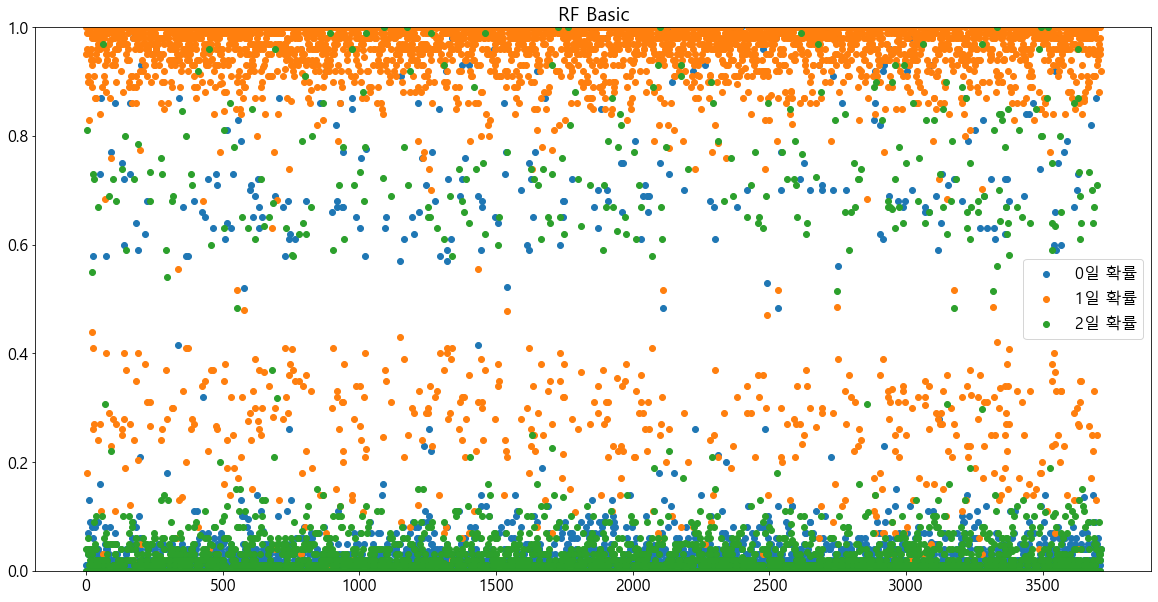

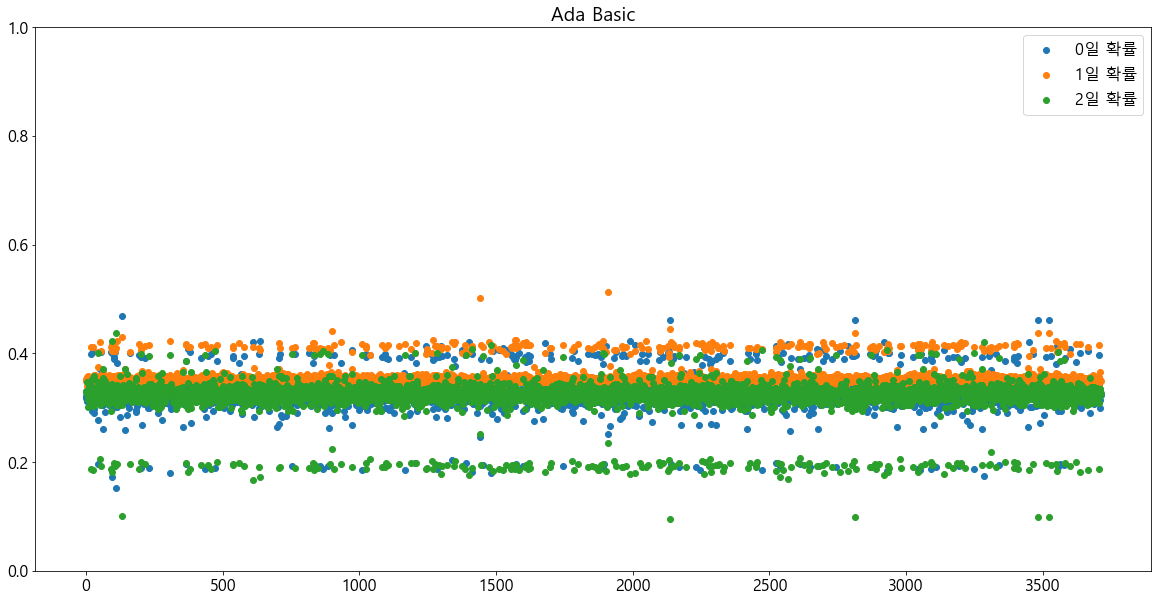

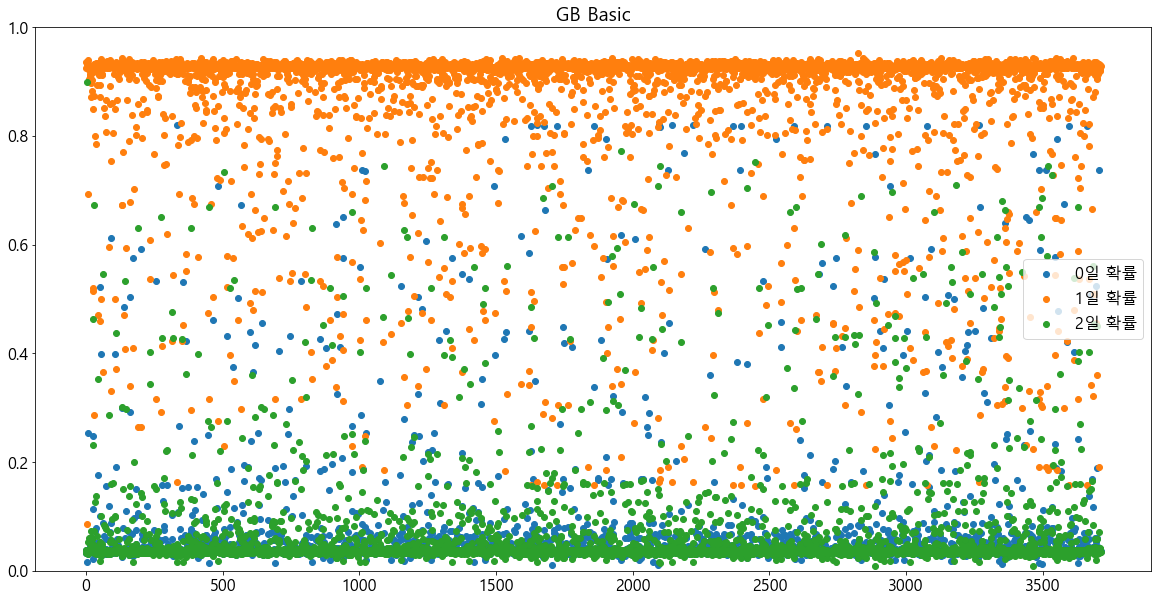

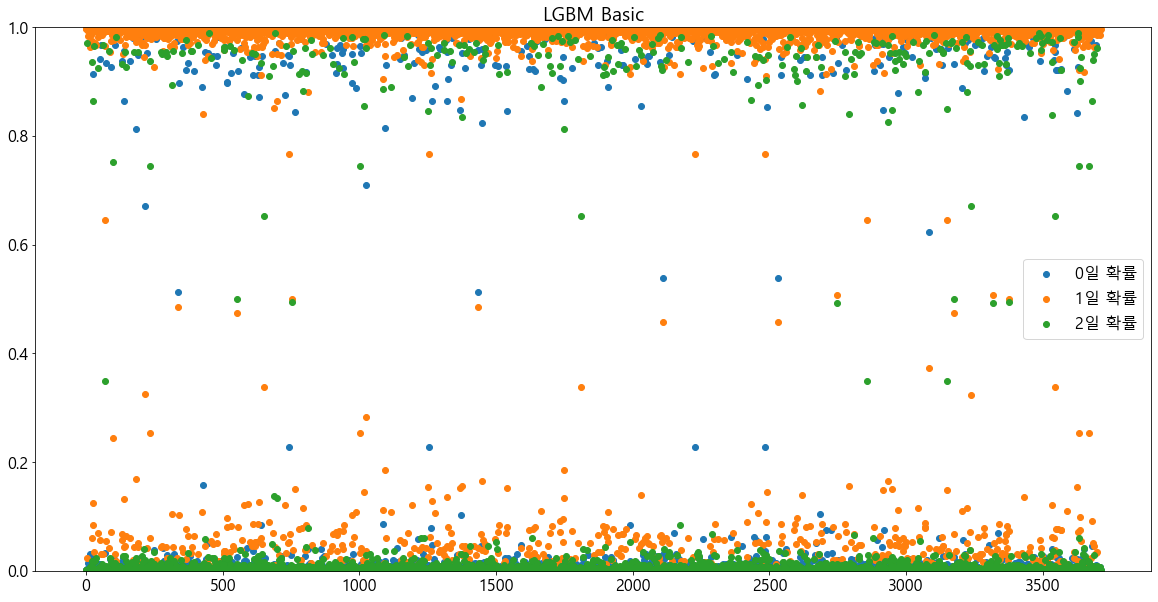

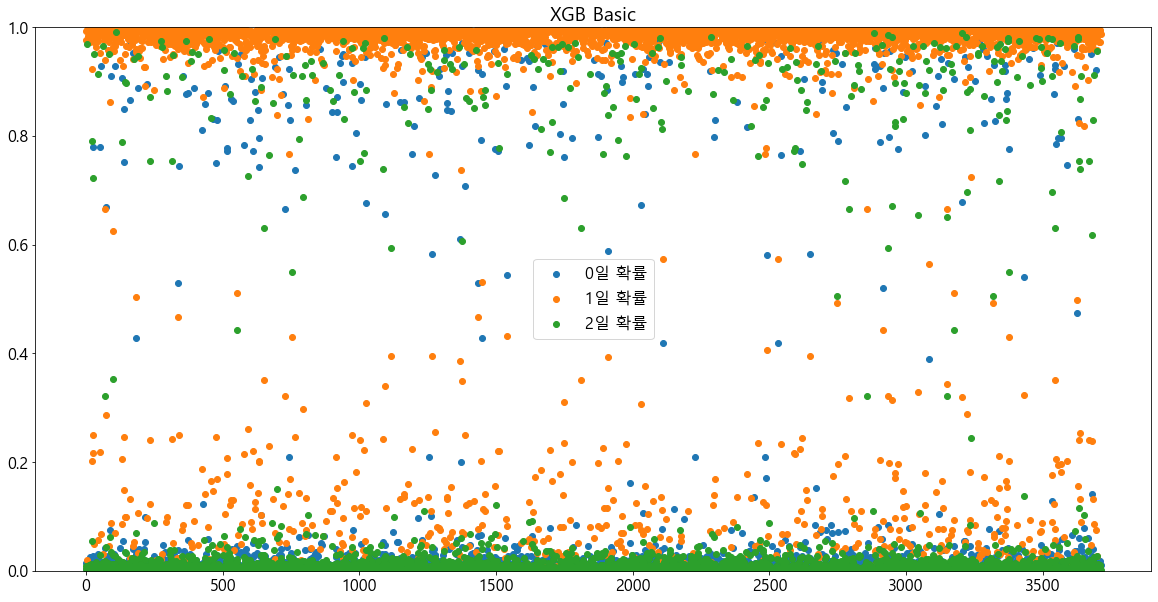

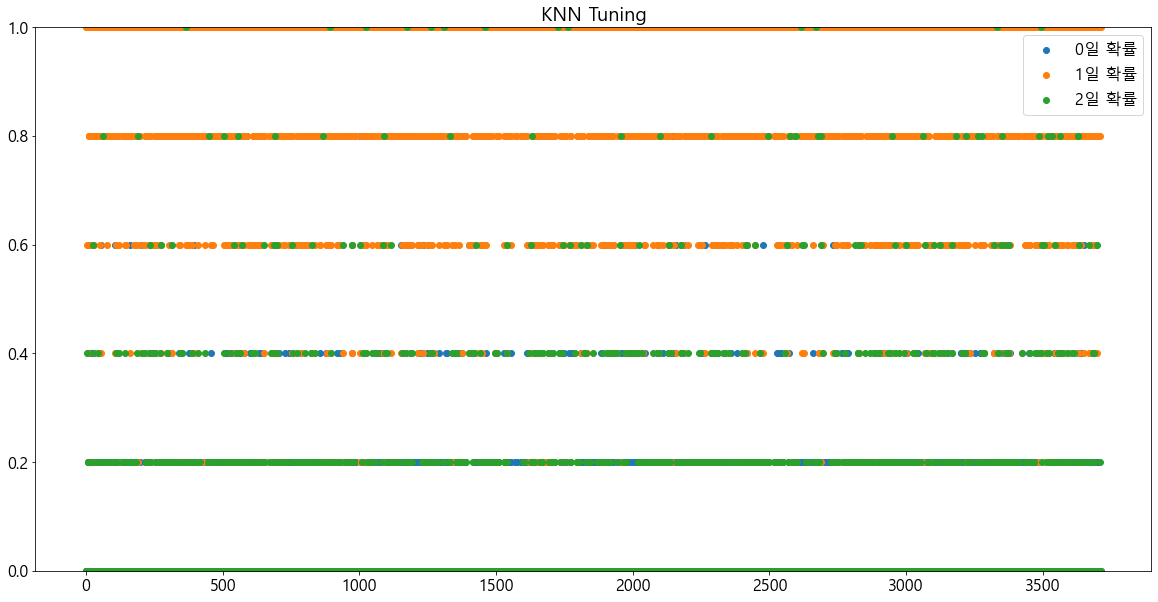

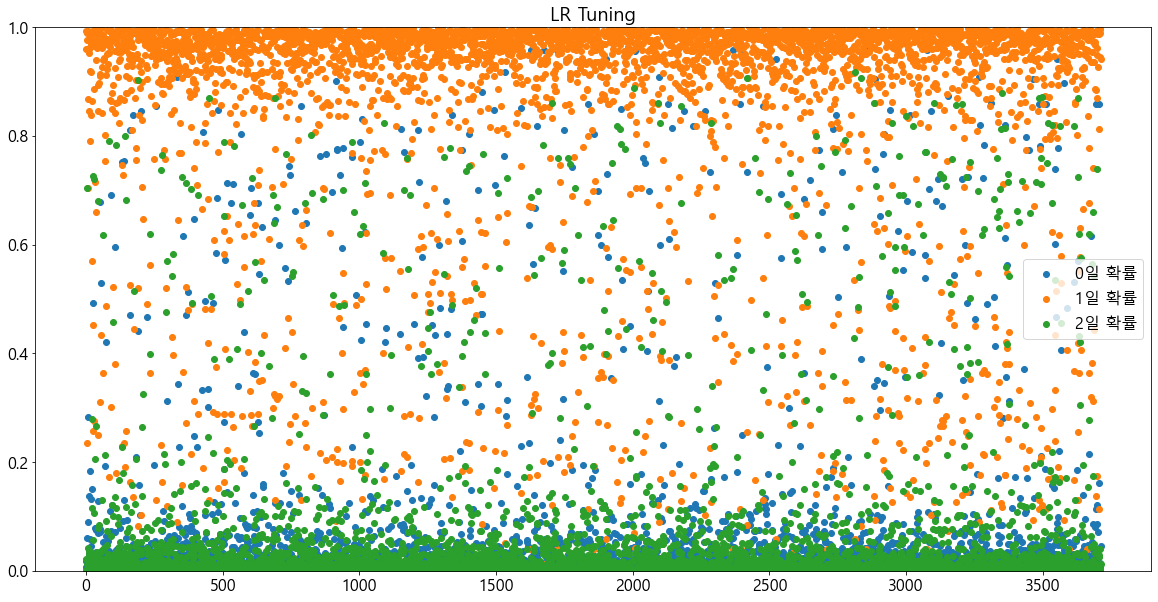

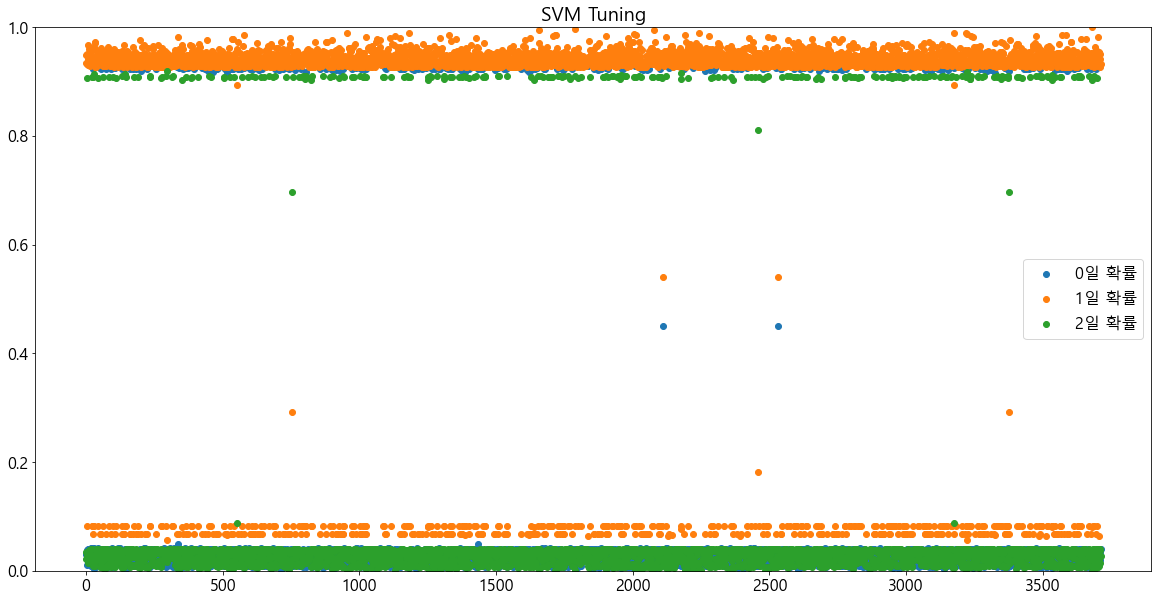

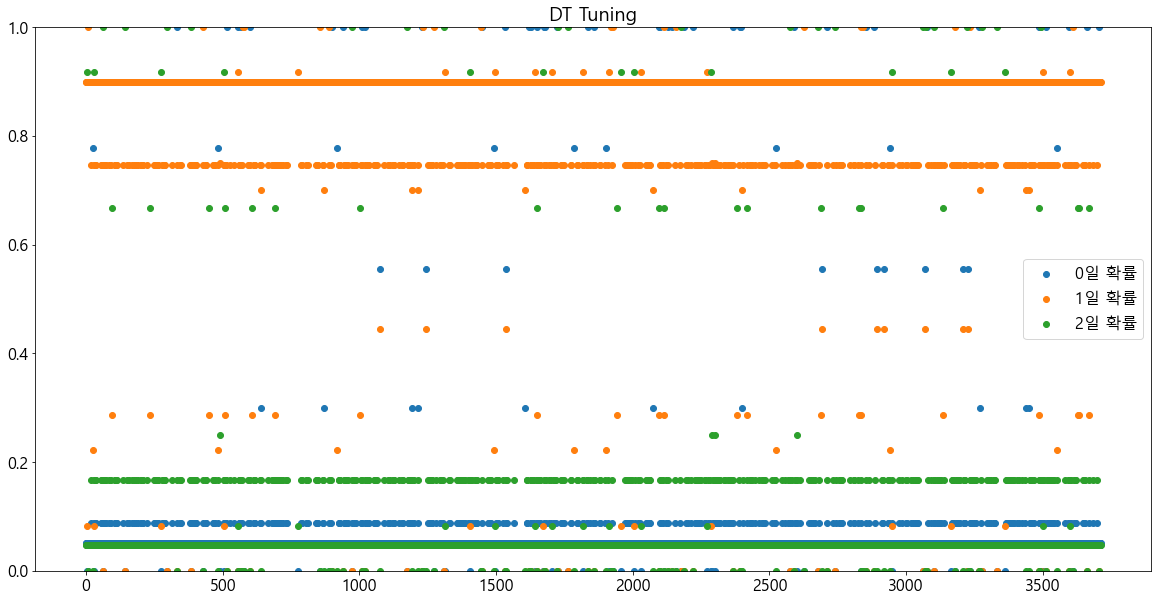

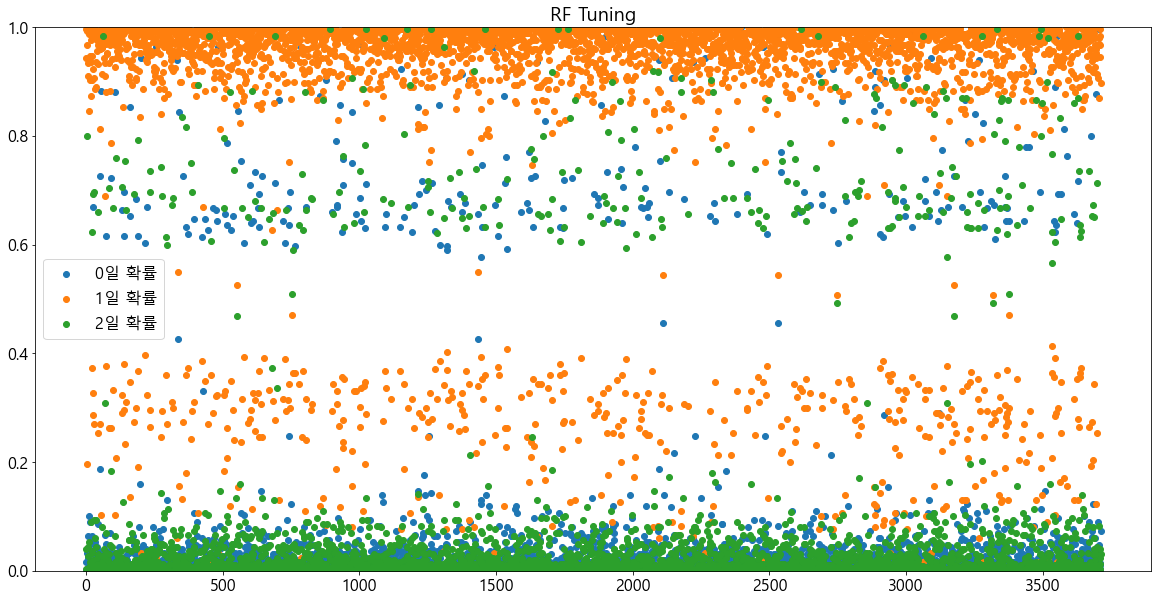

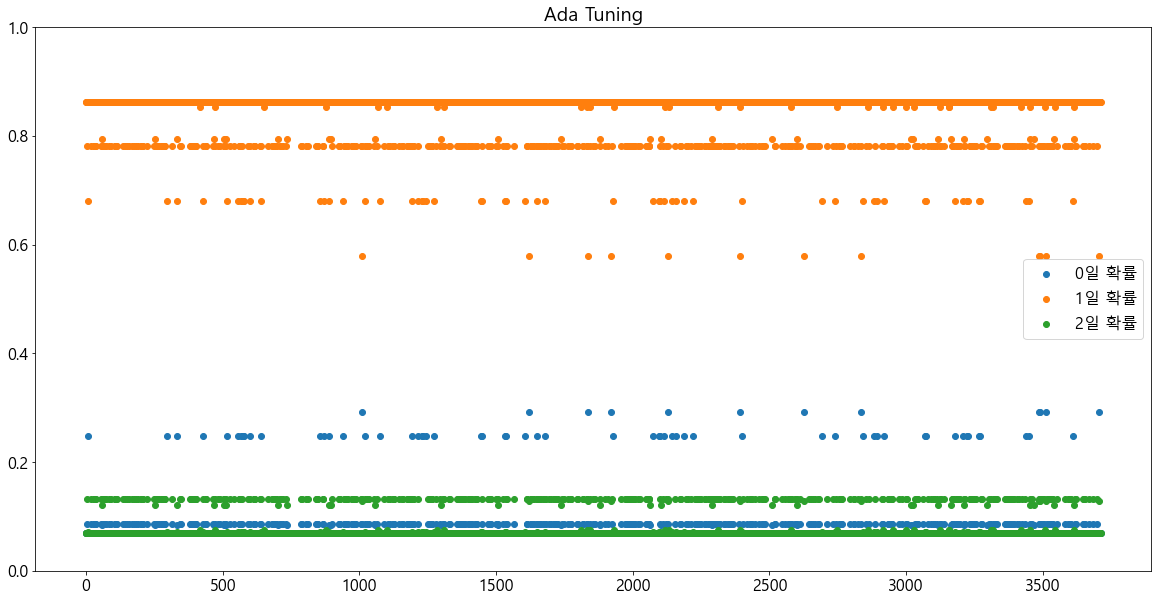

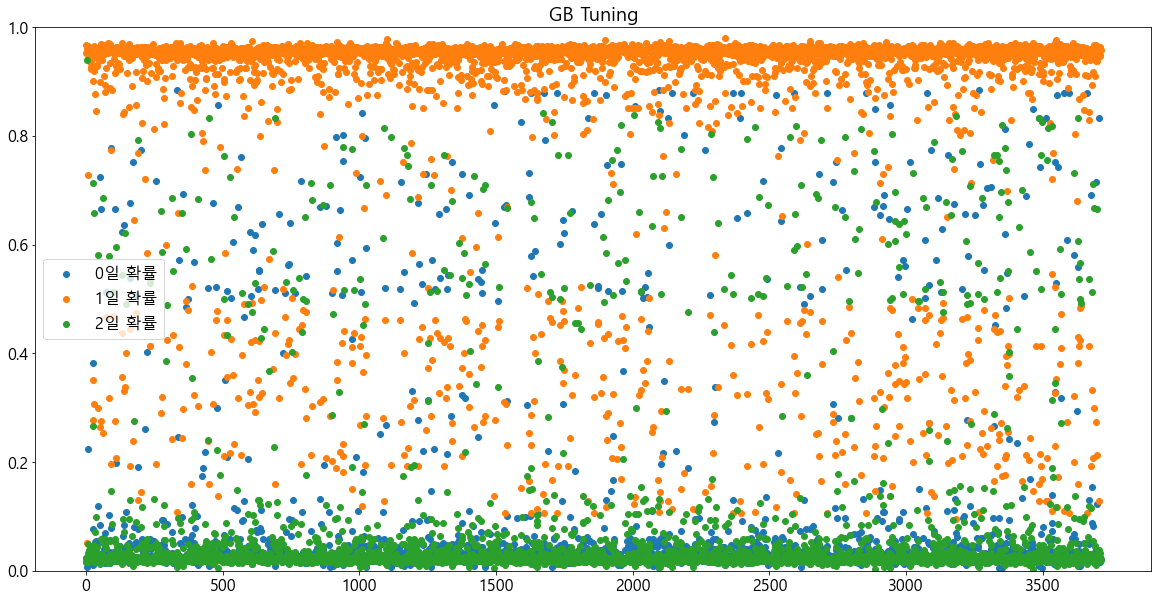

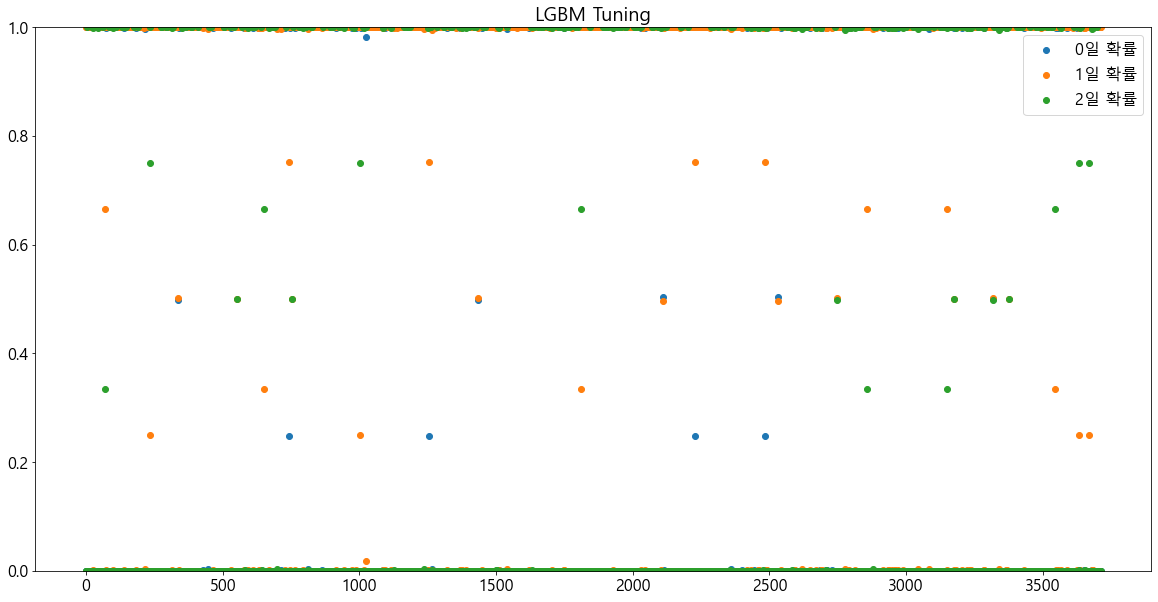

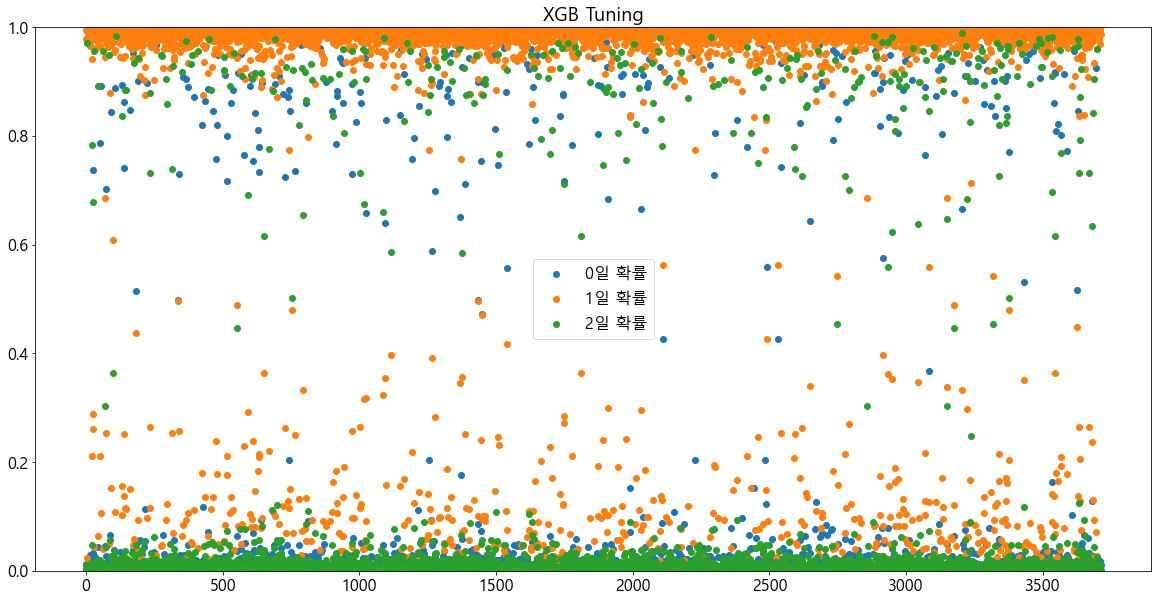

In [45]:
# 학습 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_train)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]
    # 2일 확률
    a12 = proba1[:, 2]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.scatter(list(range(len(a12))), a12, label='2일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

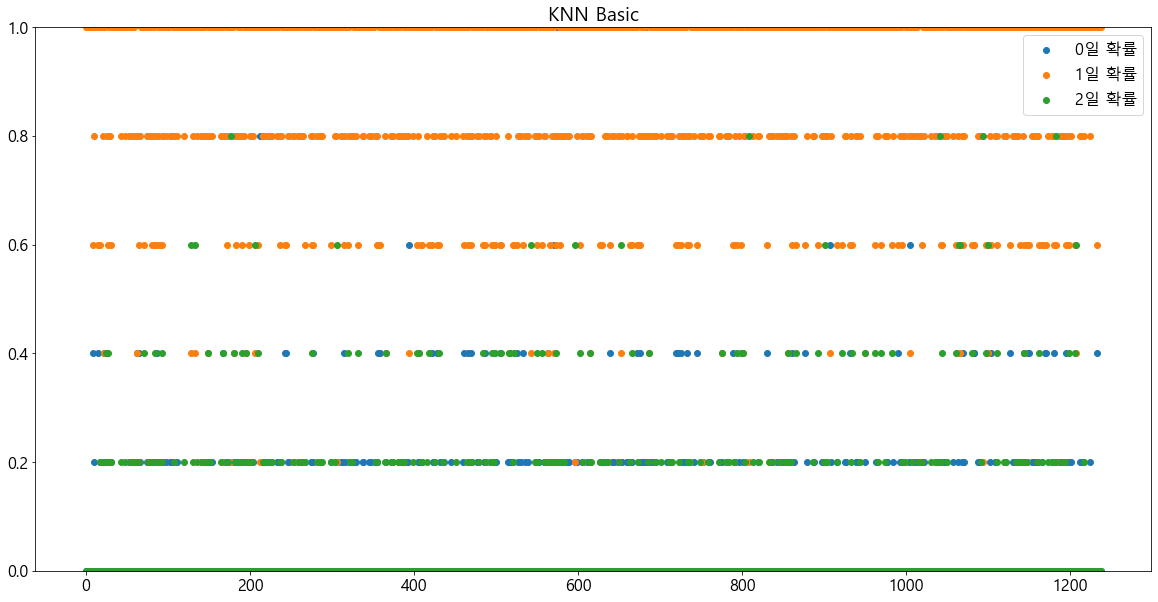

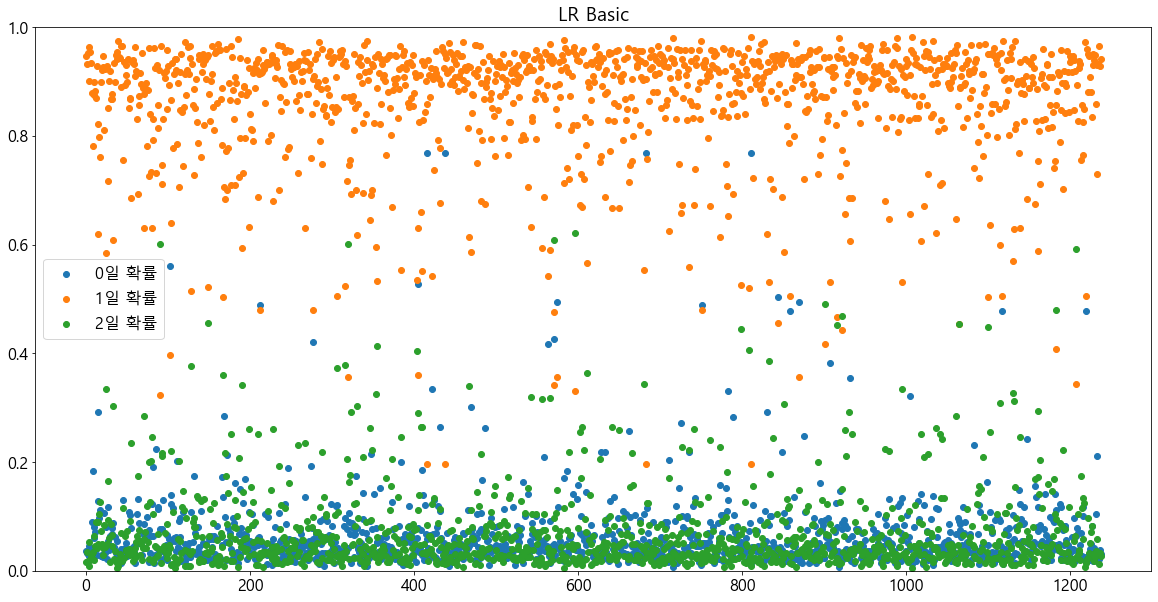

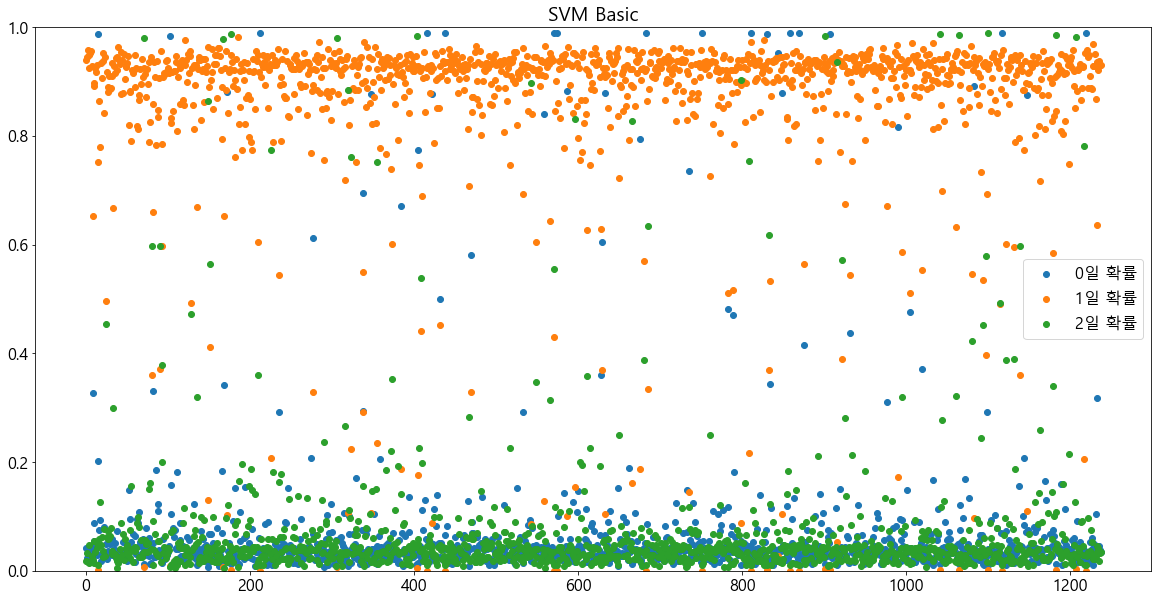

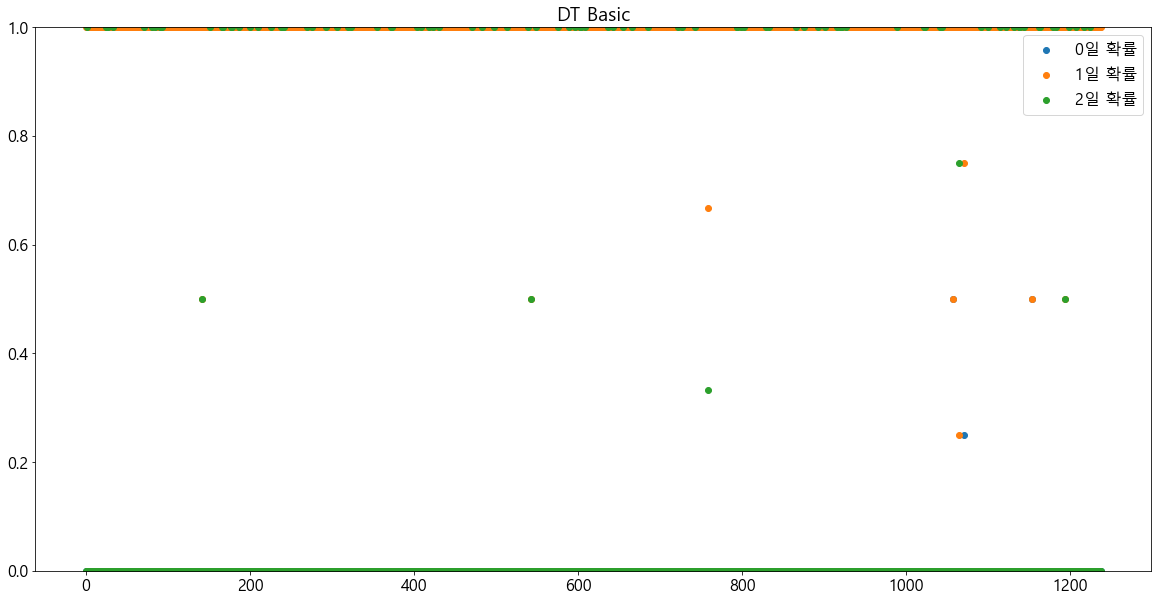

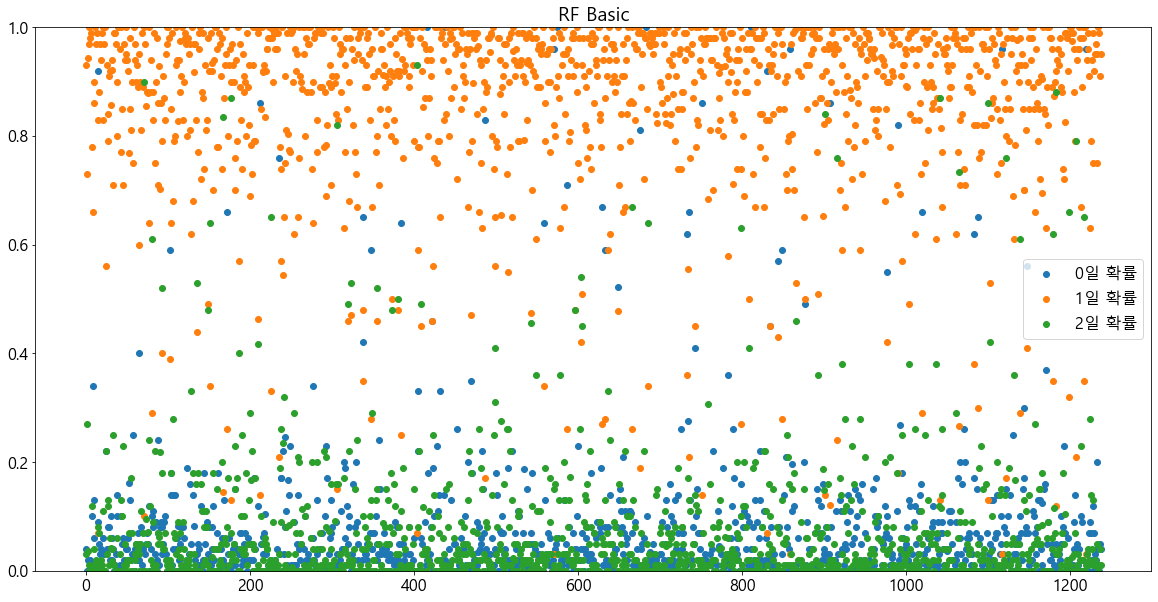

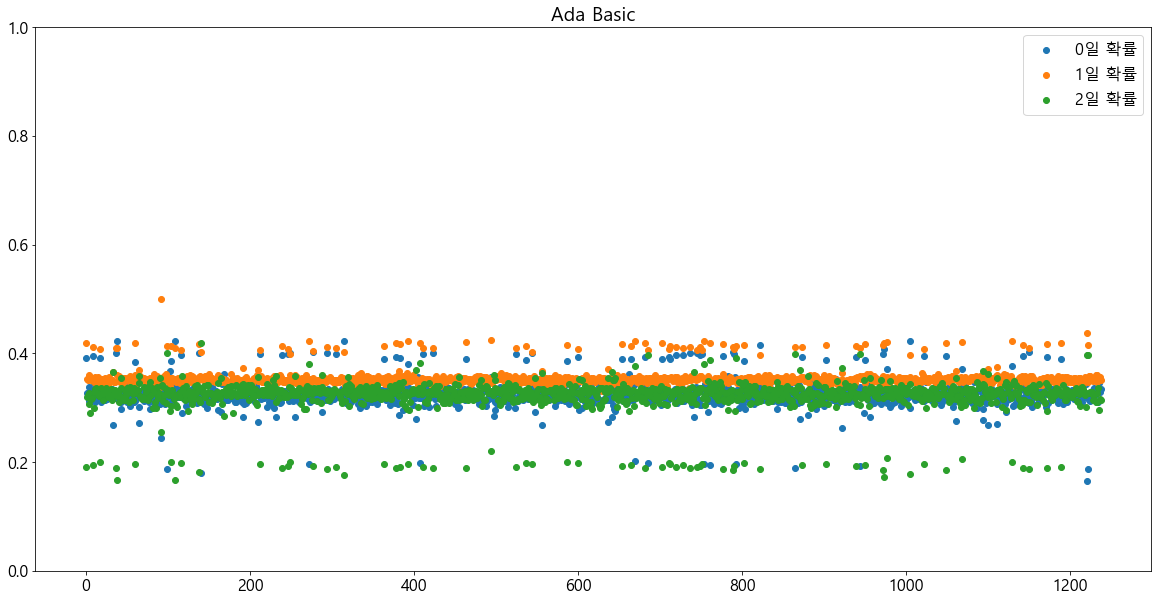

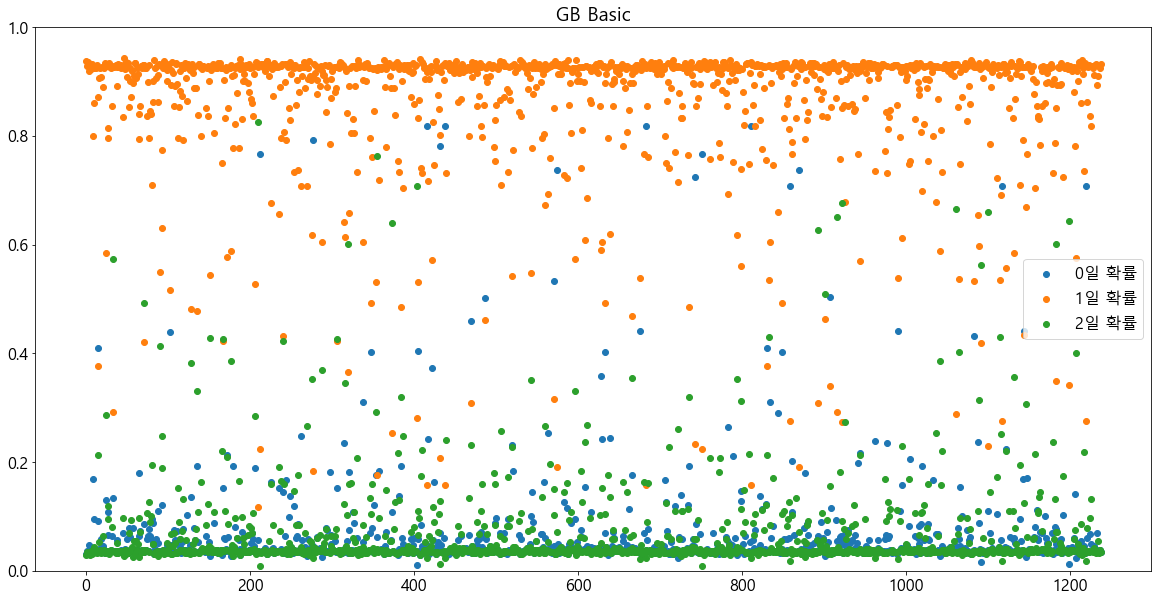

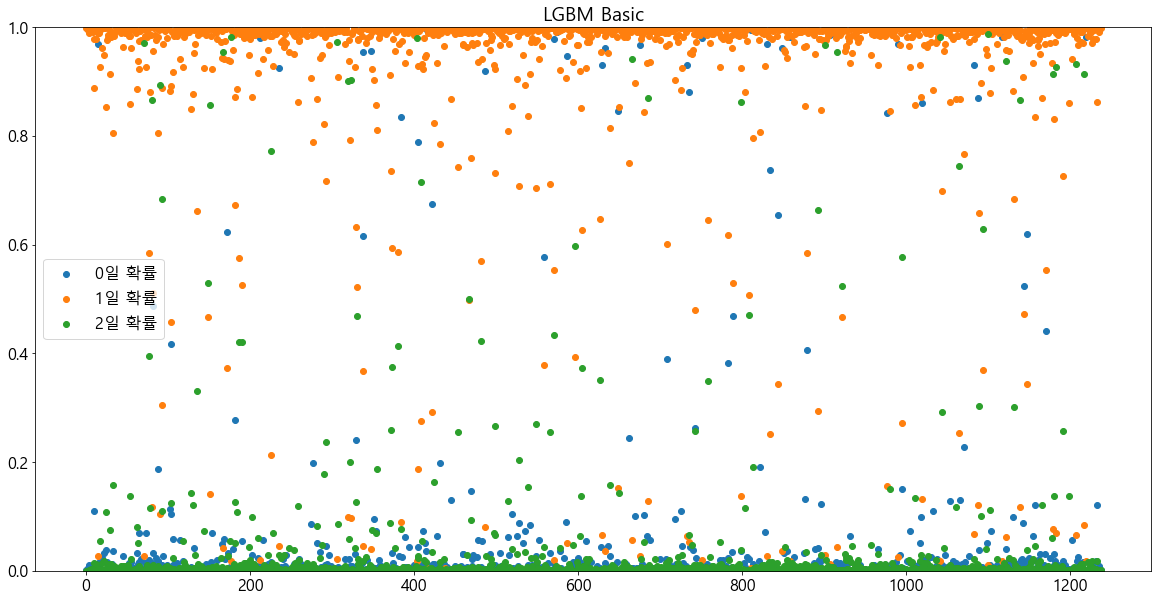

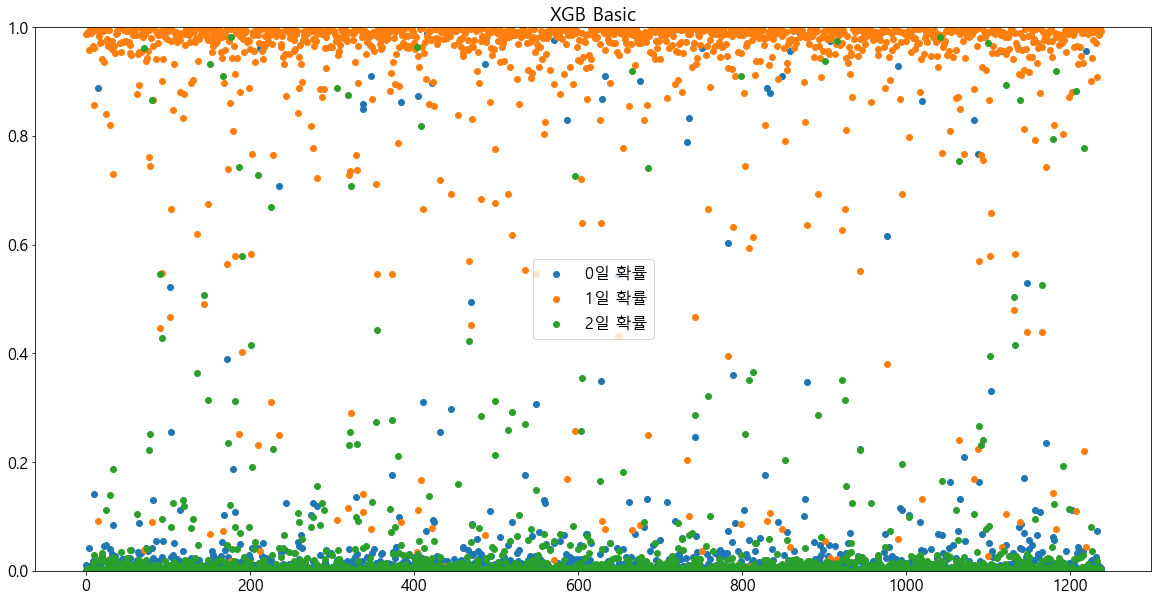

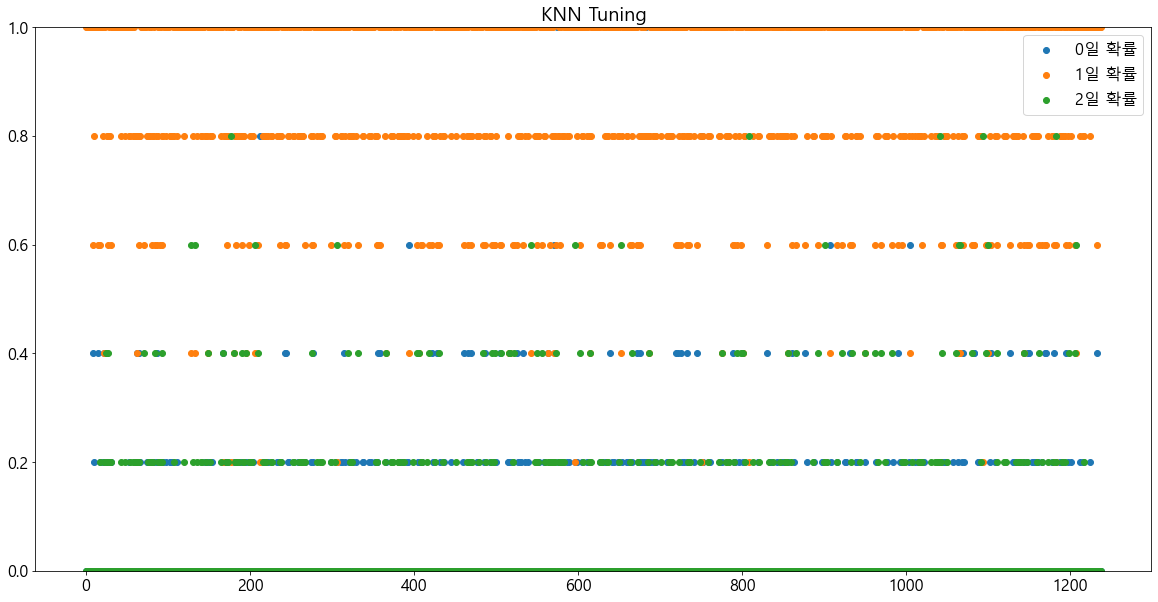

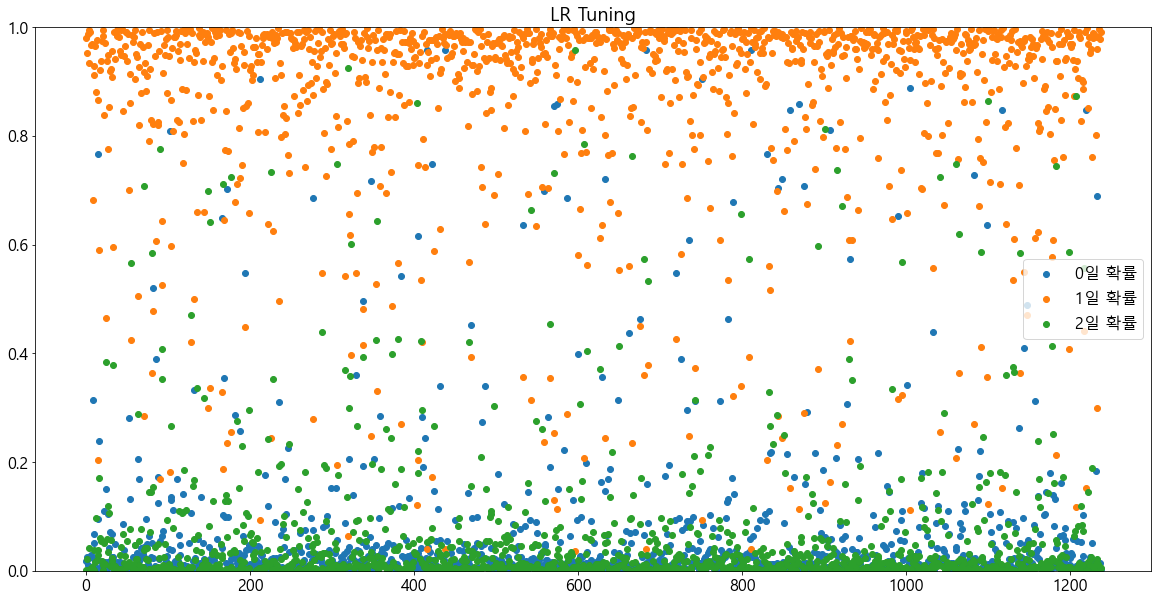

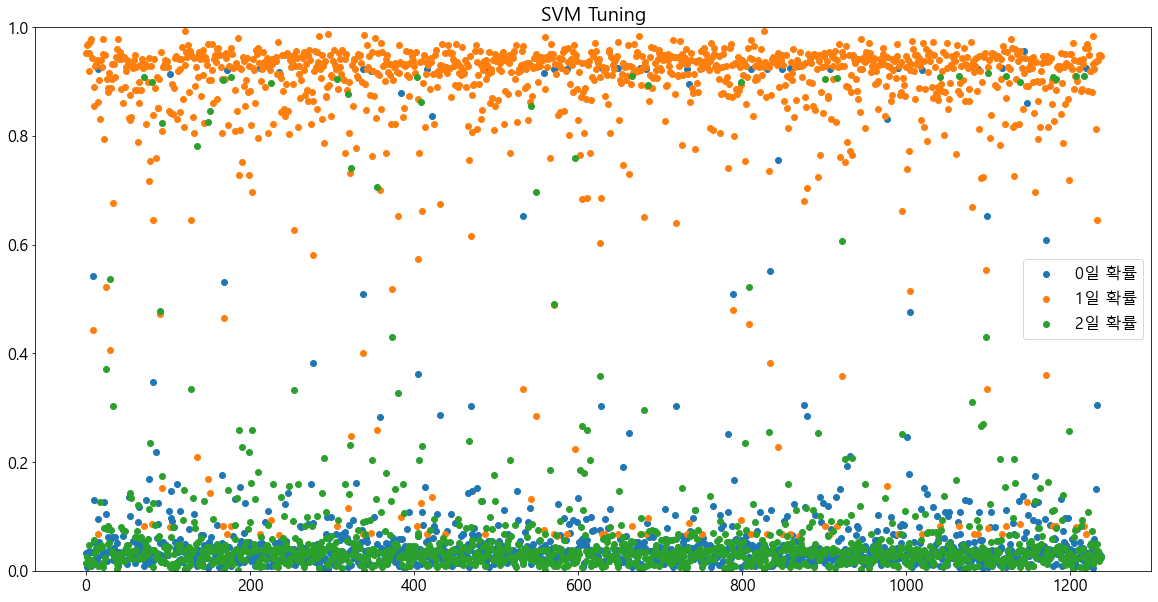

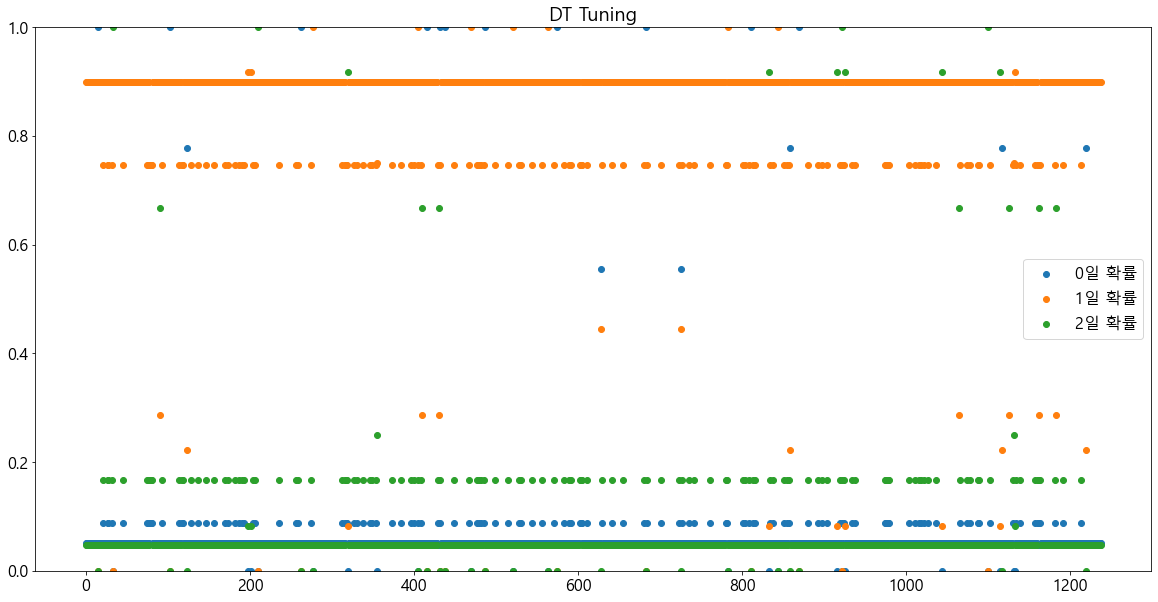

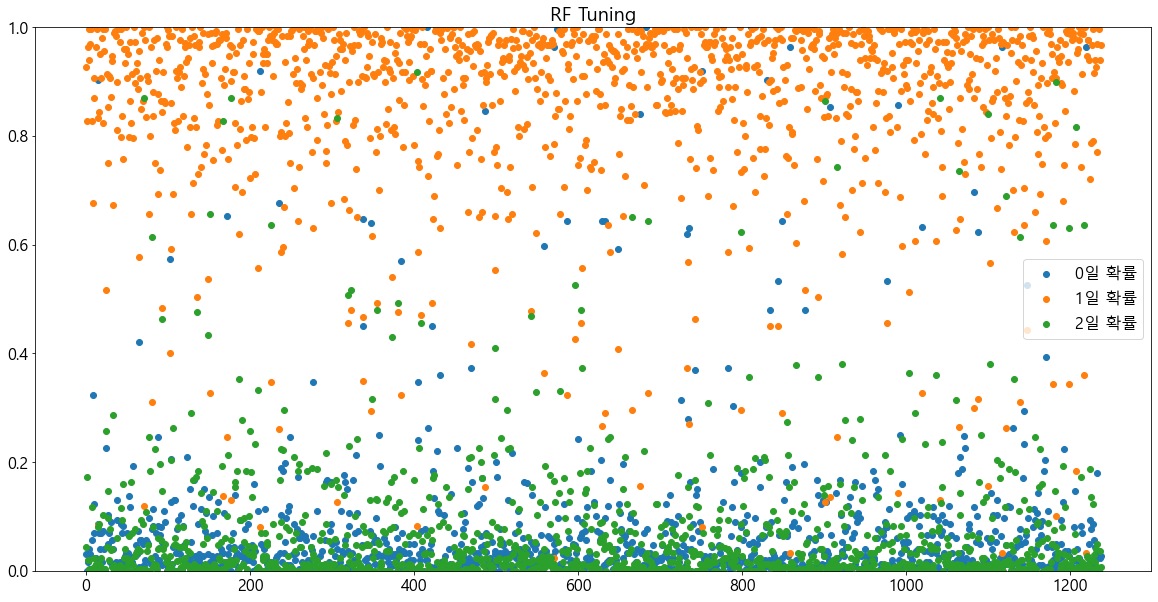

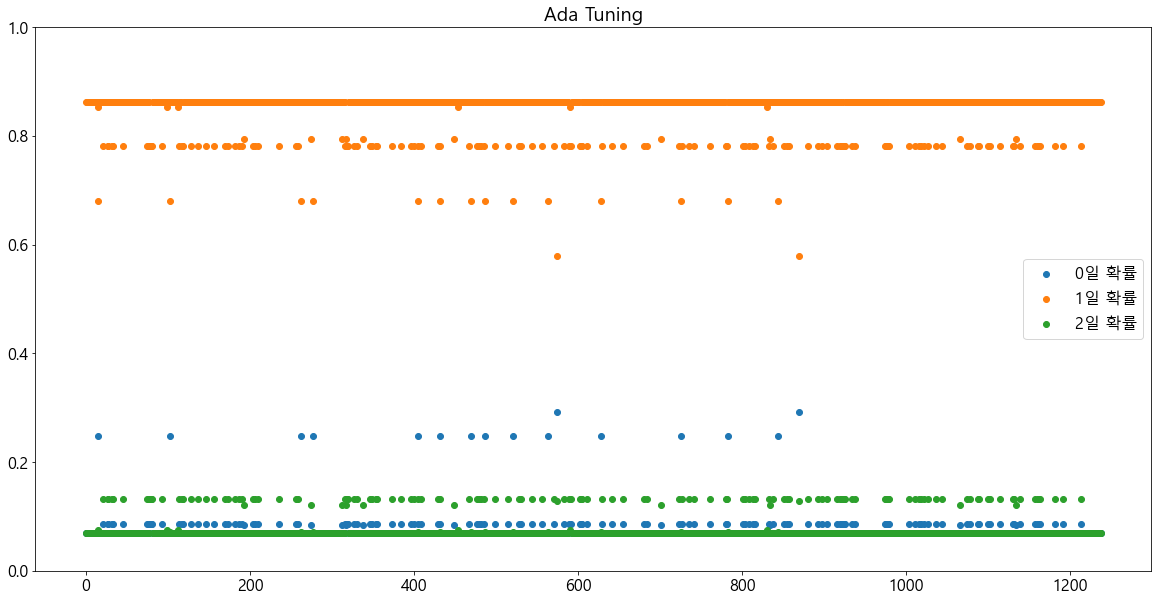

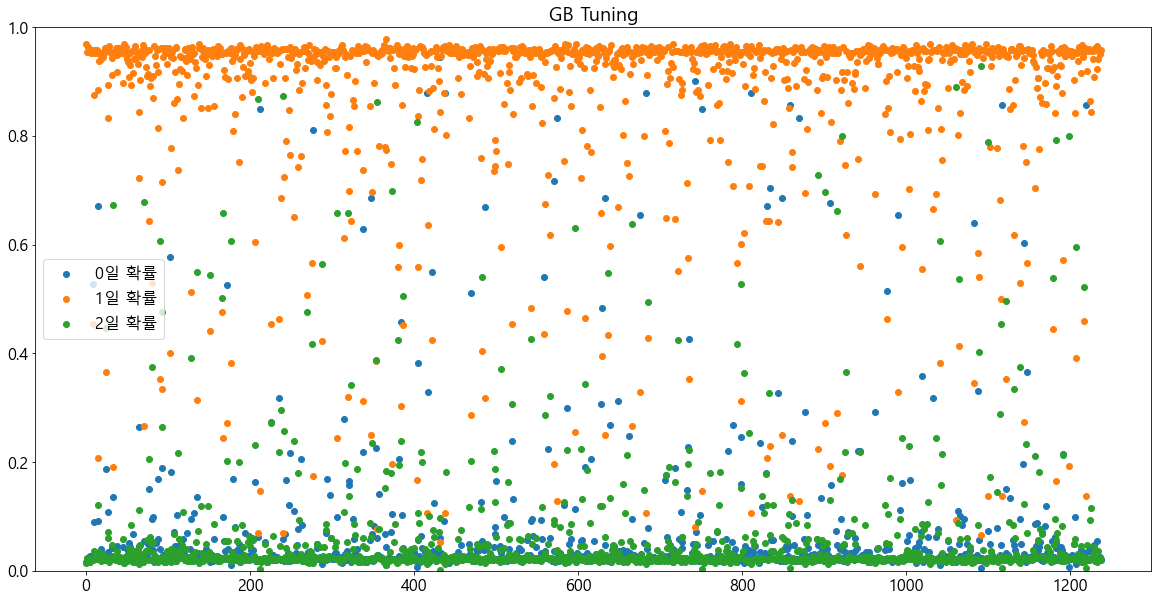

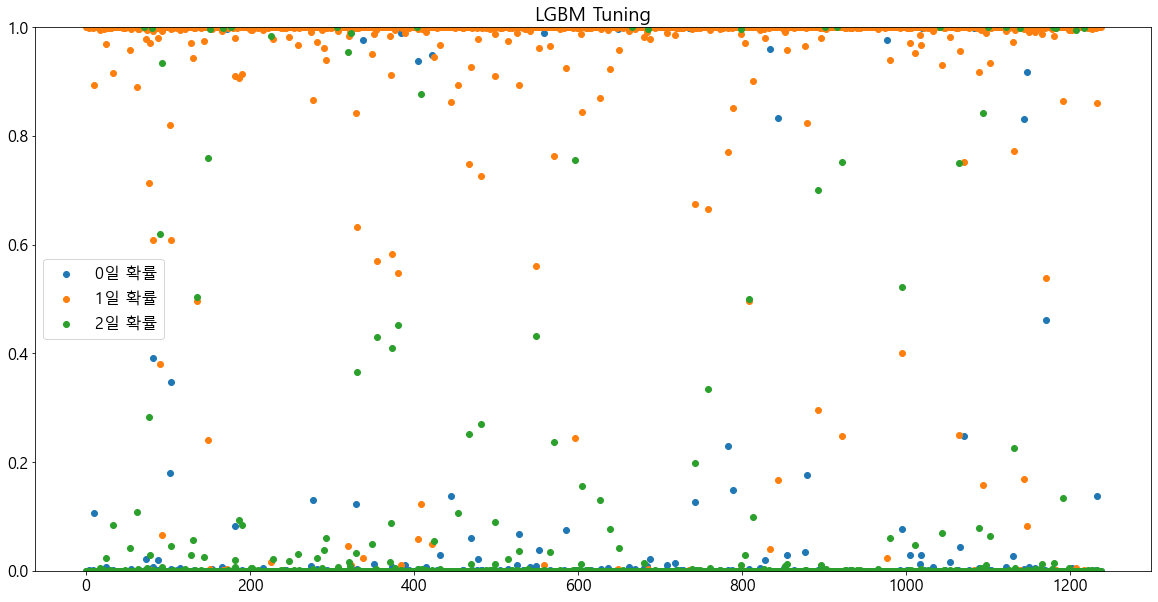

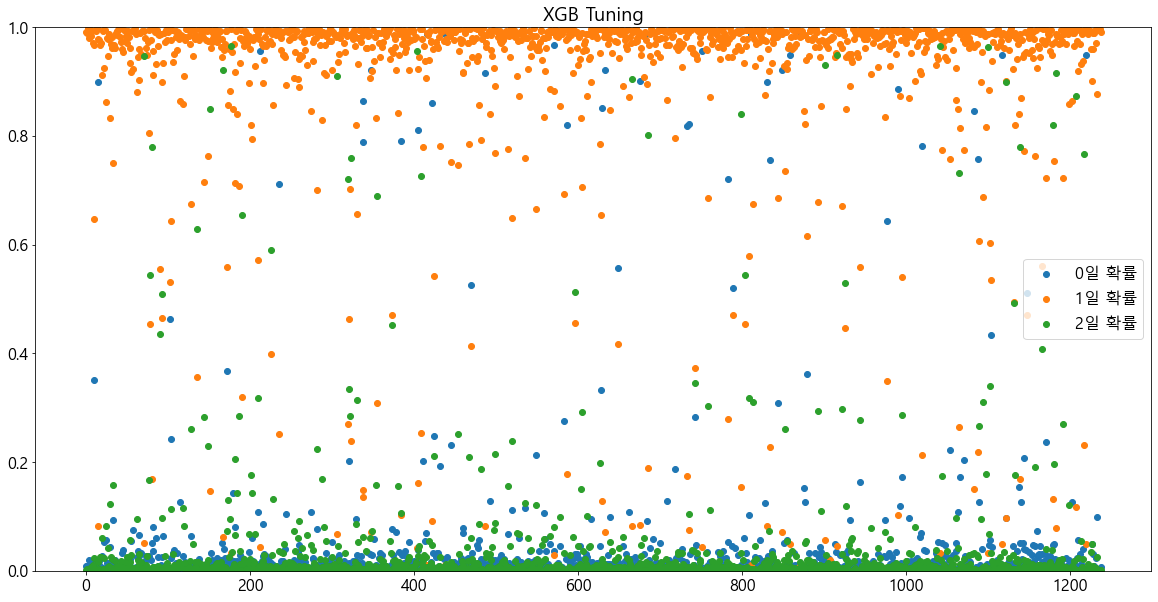

In [48]:
# 검증 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_test)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]
    # 2일 확률
    a12 = proba1[:, 2]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.scatter(list(range(len(a12))), a12, label='2일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

In [50]:
best_model = tuning_model[7]

best_model.fit(X, y)

LGBMClassifier(n_estimators=300, random_state=1)

In [52]:
test_data = [
    '새로산 폰인데 팝니다',
    '상태 매우 좋은 아이폰 입니다',
    '상태 매우 좋은 갤럭시 입니다',
    '아이폰인데 액정이 깨졌어요',
    '갤럭시인데 액정이 깨졌어요',
    '미개봉 언락폰 아이폰7 플러스 256gb 골드 iphone7 plus',
    '갤럭시 s6 풀박스로 팝니다',
    '미개봉'
]

# 학습때와 동일한 과정으로 전처리를 한다.
X = index_vectorizer.transform(test_data)
X = t_vector.transform(X)

# 예측한다.
y_pred = best_model.predict(X)
y_pred

array(['1', '1', '1', '1', '1', '1', '1', '2'], dtype=object)

In [59]:
with open('20_model.dat', 'wb') as fp :
    pickle.dump(best_model, fp)